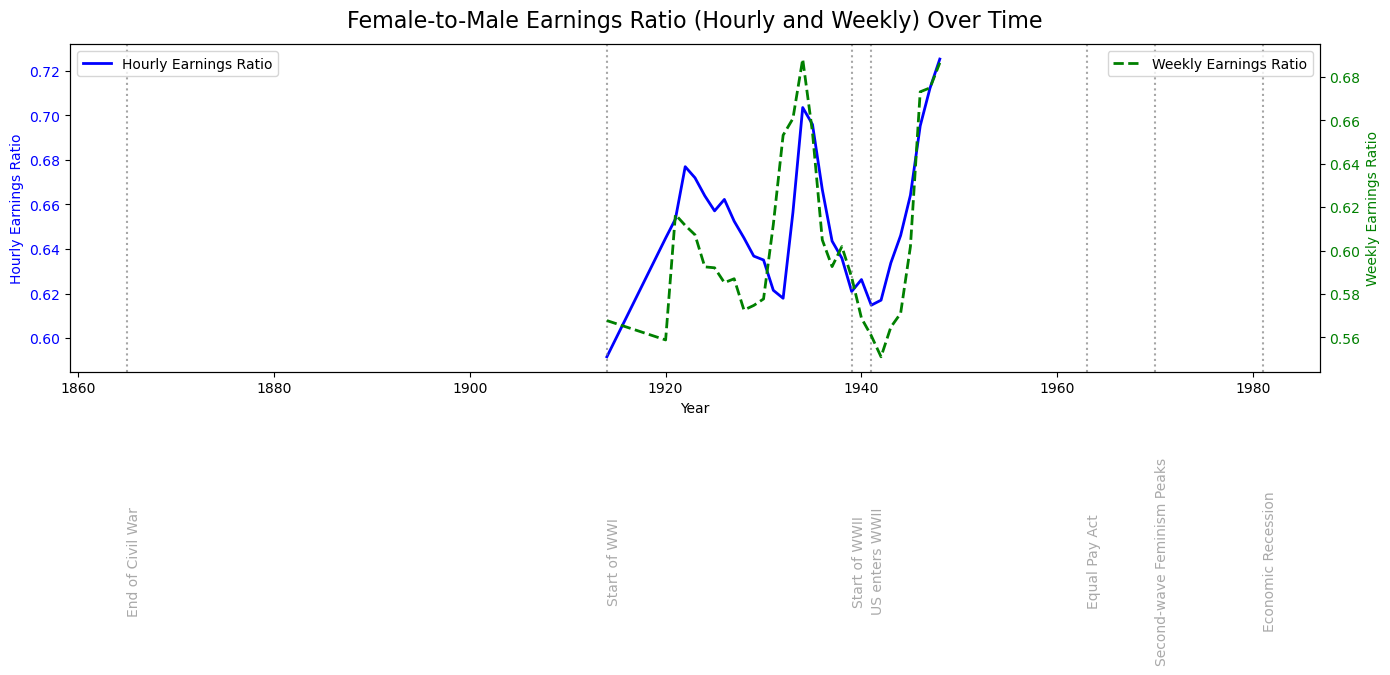

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data/Wages/Ba4381-4390.xls"
sheet_name = "Ba4381-4390"

# Read the data and rename columns for better readability
columns_mapping = [
    "Year",
    "All_Hourly",
    "All_Weekly",
    "Male_Hourly",
    "Male_Weekly",
    "Female_Hourly",
    "Female_Weekly",
    "UnskilledMale_Hourly",
    "UnskilledMale_Weekly",
    "SkilledMale_Hourly",
    "SkilledMale_Weekly"
]

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = columns_mapping

# Compute the Female-to-Male Hourly and Weekly Earnings Ratios
df["Hourly_Ratio"] = df["Female_Hourly"] / df["Male_Hourly"]
df["Weekly_Ratio"] = df["Female_Weekly"] / df["Male_Weekly"]

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 9))

# Plot the Female-to-Male Hourly Earnings Ratio
ax1.plot(df["Year"], df["Hourly_Ratio"], label="Hourly Earnings Ratio", color="blue", linewidth=2)
ax1.set_xlabel("Year")
ax1.set_ylabel("Hourly Earnings Ratio", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Secondary Y-axis for Weekly Earnings Ratio
ax2 = ax1.twinx()
ax2.plot(df["Year"], df["Weekly_Ratio"], label="Weekly Earnings Ratio", color="green", linestyle="--", linewidth=2)
ax2.set_ylabel("Weekly Earnings Ratio", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Add annotations for significant events
annotations = [
    (1914, "Start of WWI"),
    (1939, "Start of WWII"),
    (1941, "US enters WWII"),
]

for year, label in annotations:
    ax1.axvline(x=year, color="gray", linestyle=":", alpha=0.7)
    ax1.text(year, 0.5, label, rotation=90, verticalalignment="center", fontsize=10, color="darkgray")

# Title and legend
fig.suptitle("Female-to-Male Earnings Ratio (Hourly and Weekly) Over Time", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Tight layout and display
plt.tight_layout()
plt.show()
